In [1]:
#How to select teleconference cities to minimize travelling distances?
#min(i,j) J = sum over i,j (L(i,j)*D(i,j))
#such that:
#          for all i: sum over j!=i (L(i,j)) = 1
#          for all i,j: L(i,j) <= Ui + Uj
#          sum over i(Ui) = Nc

In [3]:
from pyomo.environ import *
import matplotlib.pyplot as plt
import numpy as np
import random

In [4]:
model = AbstractModel()
#N is number of cities
model.N = Param(mutable = True)
#Nc is the number of conferences to be allocated
model.Nc = Param(mutable = True)

#i represents a set containing all the nodes 1, N
model.i = RangeSet(1, model.N)
#j is alias of i
model.j = Set(initialize=model.i)

#U indicates whether city i has the teleconference facility
model.U = Var(model.i, within=Binary)
#link indicates whether city i and j are connected
model.link = Var(model.i, model.j, within=Binary)

model.OF = Var(within=NonNegativeReals, initialize=5)

def initval(model, i):
    return random.uniform(0, 1)
model.Xloc = Param(model.i, within=NonNegativeReals, initialize=initval, mutable=True)
model.Yloc = Param(model.i, within=NonNegativeReals, initialize=initval, mutable=True)

def Ncenters_rule(model):
               return sum(model.U[i] for i in model.i) == model.Nc
model.eq1 = Constraint(rule=Ncenters_rule)

def eq2_rule(model,i):
               return sum(model.link[i,j] if i!=j else 0 for j in model.j) == 1
model.eq2 = Constraint(model.i, rule=eq2_rule)
               
def eq3_rule(model,i, j):
    if i !=j:
        return model.link[i,j] <= model.U[j] + model.U[i]
    else:
        return Constraint.Skip
model.eq3 = Constraint(model.i, model.j, rule=eq3_rule)

def rule_OF(model):
    return model.OF == sum(model.link[i,j]*((model.Xloc[i]-model.Xloc[j])**2+(model.Yloc[i]-model.Yloc[j])**2) if i!=j else 0 for i in model.i for j in model.j)
model.C = Constraint(rule=rule_OF)

model.obj1 = Objective(expr=model.OF, sense=minimize)
opt = SolverFactory('glpk')
#instance.display()

In [5]:
model.N = 20
model.Nc = 3

In [6]:
#instance = model.create_instance("/usr/khanshis/Dropbox/pythonfiles save/ex16.dat")
instance = model.create_instance()
results = opt.solve(instance) #solves and updates instance
print('OF= ', value(instance.obj1))

    mutable Param).  The linkage between this RangeSet and the original source
    data will be broken, so updating the data value in the future will not be
    reflected in this RangeSet.  To suppress this warning, explicitly convert
    the source data to a constant type (e.g., float, int, or immutable Param)
OF=  0.885944426239931


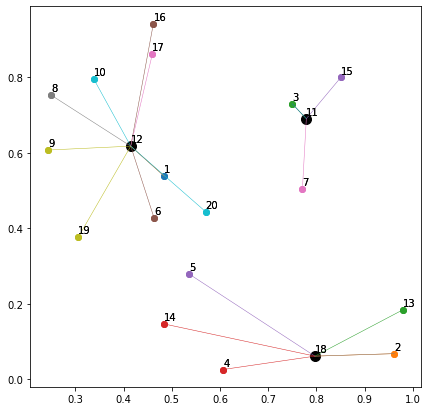

In [8]:
fig = plt.figure(figsize=(7,7))
Xc = np.linspace(0, 1, 100);
for i in instance.i:
    plt.scatter(value(instance.Xloc[i]), value(instance.Yloc[i]), label=str(i))
    plt.text(value(instance.Xloc[i]), 0.01+value(instance.Yloc[i]), str(i))
    if value(instance.U[i]) >= 0.99:
        plt.scatter(value(instance.Xloc[i]), value(instance.Yloc[i]), color='black', s=100)
#plt.legend()

for i in instance.i:
    plt.scatter(value(instance.Xloc[i]), value(instance.Yloc[i]), label=str(i))
    plt.text(value(instance.Xloc[i]), 0.01+value(instance.Yloc[i]), str(i))
    if value(instance.U[i]) >= 0.99:
        plt.scatter(value(instance.Xloc[i]), value(instance.Yloc[i]), color='black', s=50)
    
for i in instance.i:
    for j in instance.j:
        if i!=j:
            if value(instance.link[i,j]) > 0.99:
                startP = [value(instance.Xloc[i]), value(instance.Xloc[j])]
                endP = [value(instance.Yloc[i]), value(instance.Yloc[j])]
                plt.plot(startP, endP, lw=0.5)

#plt.legend()
#plt.xlim(0, 1)
#plt.ylim(0, 1)

OF=  1.45003145030526
OF=  0.524752554764346
OF=  0.338211161259276
OF=  0.306692278785838


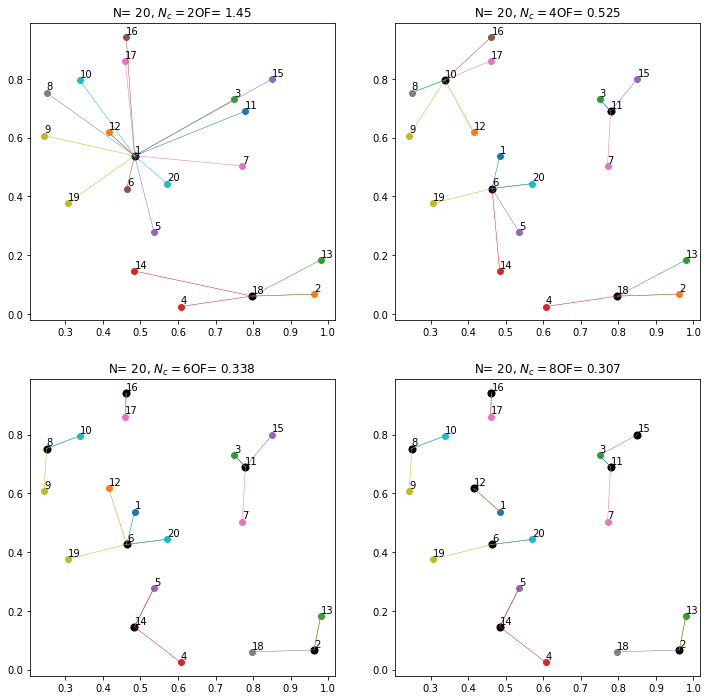

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,12))
Ncvec=[2, 4, 6, 8]

for counter in range(0, len(Ncvec)):
    plt.subplot(2, 2, counter+1)
    instance.Nc = Ncvec[counter]
    results = opt.solve(instance) #solves and updates instance
    OF = round(value(instance.obj1), 3)
    plt.title('N= ' + str(value(instance.N)) + ', $N_c=$' + str(Ncvec[counter])+ 'OF= '+ str(OF))
    print('OF= ', value(instance.obj1))

    for i in instance.i:
        plt.scatter(value(instance.Xloc[i]), value(instance.Yloc[i]), label=str(i))
        plt.text(value(instance.Xloc[i]), 0.01+value(instance.Yloc[i]), str(i))
        if value(instance.U[i]) >= 0.99:
            plt.scatter(value(instance.Xloc[i]), value(instance.Yloc[i]), color='black', s=50)

    for i in instance.i:
        for j in instance.j:
            if i!=j:
                if value(instance.link[i,j]) > 0.99:
                    startP = [value(instance.Xloc[i]), value(instance.Xloc[j])]
                    endP = [value(instance.Yloc[i]), value(instance.Yloc[j])]
                    plt.plot(startP, endP, lw=0.5)


In [ ]:
#Prin out details of the the constraints
instance.eq2.pprint()